In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
from sklearn.datasets import load_diabetes

In [105]:
data=load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [106]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [107]:
df=pd.DataFrame(data.data,columns=data.feature_names)


In [108]:
df['disease_prog']=data.target

In [109]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [110]:
df.shape

(442, 11)

In [111]:
x=df[data.feature_names]

In [112]:
y=df['disease_prog']

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

<Axes: >

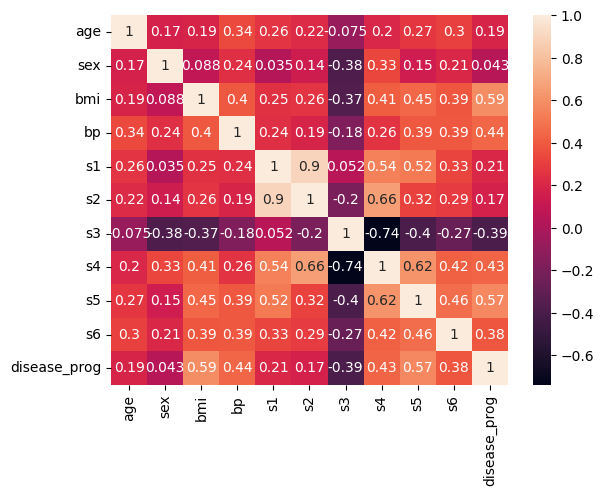

In [114]:
sns.heatmap(df.corr(),annot=True)

In [115]:
from sklearn.tree import DecisionTreeRegressor 
model=DecisionTreeRegressor(max_depth=2)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [116]:
y_pred=model.predict(x_test)

In [117]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [118]:
r2_score(y_test,y_pred)

0.35541943734175174

In [119]:
mean_absolute_error(
y_test,y_pred)
    

46.49675422592929

In [120]:
params={
'criterion':['squared_error','absolute_error'],
    'splitter':['best','random'],
'max_depth':[3,5,10,15,20,25,30],
    'max_features':['auto','sqrt','log2']
}

In [121]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV( estimator=DecisionTreeRegressor(), param_grid=params,cv=5 ,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)

C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\si

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [122]:
grid.best_score_,grid.best_params_

(-4341.387553547199,
 {'criterion': 'squared_error',
  'max_depth': 3,
  'max_features': 'sqrt',
  'splitter': 'best'})

In [123]:
y_pred=grid.predict(x_test)
mean_absolute_error(
y_test,y_pred)
    

48.52654972422949

In [124]:
r2_score(y_test,y_pred)

0.30275287788217153

In [125]:
from sklearn import tree

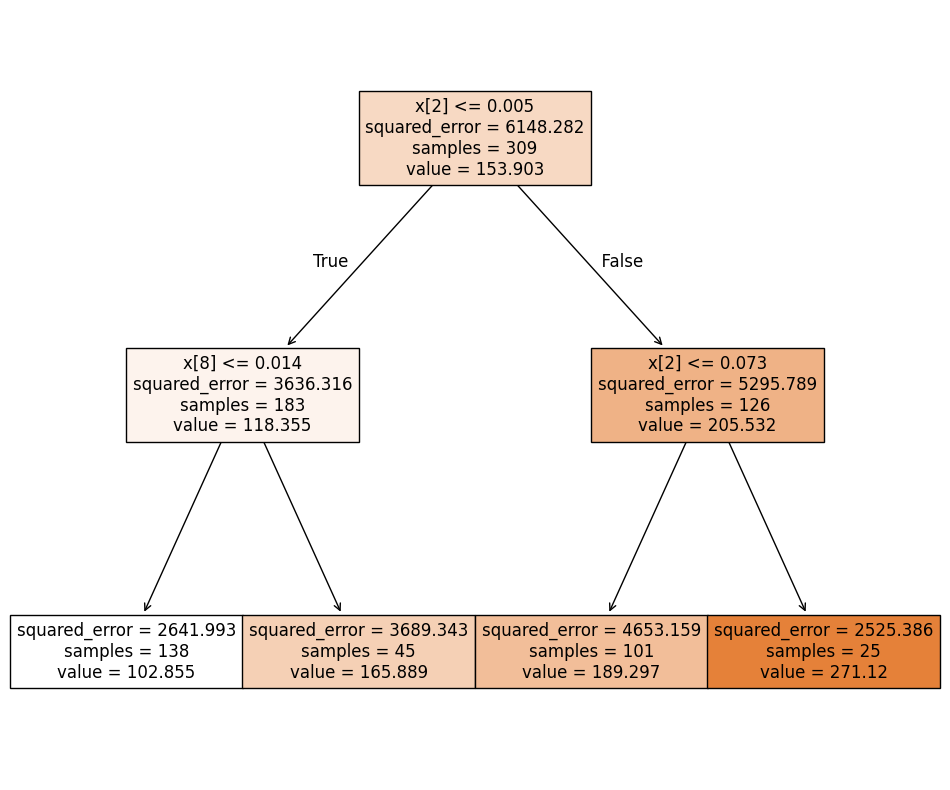

In [126]:
plt.figure(figsize=(12,10))
tree.plot_tree(model,filled=True)
plt.show()